# Transform Coding

## Contents

1. [Insights](#insights).
2. [Basic coding steps](#coding_steps).
3. [Transform (theory)](#transform_theory).
4. [A color transform (RGB/YUV)](#color_transform).
6. [DCT (Discrete Cosine Transform)](#DCT).
7. [DWT (Discrete Wavelet Transform)](#DWT).
8. [Bit-planes progression](#bitplanes_progression).
9. [Code-stream orderings and scalabilities](#scalabilities).

## Insights<a id='insights'></a>

* Signals can be represented at least in two different domains: the signal domain (for example, time in the case of sound of space in the case of image) and the frequency domain.
* Transform coding is based on the idea that, in the frequency domain, most of the energy of the signal can be compacted in a small number of transform coefficients.
* This property can be interesting for increasing the coding efficiency.

## Basic coding steps<a id='coding_steps'></a>

### Encoder

1. Split $s$ into blocks of $B$ samples, if required.
2. Transform each block.
3. Performs a bit-allocation procedure over the coefficientes.
4. Lossless encode the quantized coefficients.

### Decoder

1. Decode the coefficients of each block.
2. "Dequantize" the coefficients of each block.
3. Inverse-transform each block.
4. Join the blocks, if required.

## Splitting

1. Divide $s=\{s[n]\}_{n=0}^{N-1}$ into blocks $\{s[n]\}_{n=0}^{B-1}$ of $B$ samples.

## Transform (some theory)<a id='transform_theory'></a>

* In the forward transform the samples of the block are correlated with (the block is compared to) a set of basis functions

  \begin{equation}
    \{S[k]\}_{k=0}^{B-1} = \sum_{n=0}^{B-1}a_{k,n}s[n].
    \tag{forward_transform}
  \end{equation}

* The backward (inverse) transform restores the original samples

  \begin{equation}
    \{s[n]\}_{n=0}^{B-1} = \sum_{k=0}^{B-1}b_{n,k}S[k].
    \tag{inverse_transform}
  \end{equation}
  
* These equations can be written in matrix form as
  
  \begin{equation}
    S=As
    \tag{forward_transform_matrix_form}
  \end{equation}
  
  \begin{equation}
    s=BS,
    \tag{inverse_transform_matrix_form}
  \end{equation}
  
  where $A$ and $B$ are matrices, being
  
  \begin{equation}
    \begin{array}{l}
    [A]_{k,n} = a_{k,n} \\
    [B]_{n,k} = b_{n,k}.
    \end{array}
  \end{equation}
  
* In transform coding, $A$ and $B$ must be inverses of each other ($B=A^{-1}$), i.e.

  \begin{equation}
    AB = BA = I,
  \end{equation}
  
  where $I$ is the identity matrix.

## A color transform<a id='color_transform'></a>

###  Luminance and chrominance<a id='color_transform'></a>

* [Chrominance](https://en.wikipedia.org/wiki/Chrominance) (or chroma) is the signal used in video systems to convey the color information of the picture or a video. It was defined to add the color signal to the black and white one in analog TV. Thus, the same signal, composed by two different subsignals: Y and UV that can be isolated by filtering, was compatible with both, black and white (which only used Y) and color ones (that used [YUV](https://en.wikipedia.org/wiki/YUV)).

\begin{equation}
    \left(
      \begin{array}{c}
        \text{Y}\\
        \text{U}\\
        \text{V}
      \end{array}
    \right) =
    \left(
      \begin{array}{rrr}
          0,299 & 0,587 & 0,144 \\
          -0.14713 & -0.28886 &  0.436 \\
          0.615   & -0.51499 & -0.10001
      \end{array}
    \right)
    \left(
      \begin{array}{c}
        \text{R}\\
        \text{G}\\
        \text{B}
      \end{array}
    \right)
\end{equation}

\begin{equation}
    \left(
      \begin{array}{c}
        \text{R}\\
        \text{G}\\
        \text{B}
      \end{array}
    \right) =
    \left(
      \begin{array}{rrr}
          1 &  0       &  1.13983 \\
          1 & -0.39465 & -0.58060 \\
          1 &  2.03211 &  0
      \end{array}
    \right)
    \left(
      \begin{array}{c}
        \text{Y}\\
        \text{U}\\
        \text{V}
      \end{array}
    \right)
\end{equation}

* Later, in digital video, the YUV color domain was called the [YCrCb color domain](https://en.wikipedia.org/wiki/YCbCr).

* Used, for example, in [JPEG](https://en.wikipedia.org/wiki/JPEG).

### Spectral (color) redundancy<a id='color_redundancy'></a>

* [$\text{RGB}$ domain](https://en.wikipedia.org/wiki/RGB_color_model) is more redundant than the [$\text{YUV}$ domain](https://en.wikipedia.org/wiki/YUV):

In [ ]:
!if [ ! -f color_subsampling.svg ]; then \
  wget http://www.hpca.ual.es/~vruiz/images/san-diego.png; \
fi

<img src="san-diego.png">

In [1]:
# pip install imageio scipy numpy
import imageio
from scipy.stats import entropy
import numpy as np

In [2]:
RGB = imageio.imread('san-diego.png')

In [20]:
RGB

Image([[[ 11,   0,  92],
        [ 18,   0,  85],
        [  4,   0,  89],
        ...,
        [ 34,  46, 158],
        [ 40,  57, 163],
        [ 41,  54, 163]],

       [[ 11,   0,  89],
        [  3,   0,  86],
        [  0,   0,  96],
        ...,
        [ 43,  52, 163],
        [ 50,  53, 161],
        [ 45,  49, 162]],

       [[  3,   0,  89],
        [  6,   0,  85],
        [  3,   0,  84],
        ...,
        [ 37,  50, 164],
        [ 47,  58, 163],
        [ 41,  44, 159]],

       ...,

       [[  9,   0,  77],
        [  4,   0,  71],
        [  5,   0,  78],
        ...,
        [141, 131, 182],
        [147, 135, 181],
        [152, 138, 184]],

       [[  0,   0,  78],
        [  2,   0,  71],
        [ 12,   0,  69],
        ...,
        [151, 139, 178],
        [135, 120, 172],
        [138, 123, 177]],

       [[  8,   0,  71],
        [  4,   0,  80],
        [ 11,   0,  72],
        ...,
        [181, 163, 198],
        [150, 129, 184],
        [137, 125, 183]]

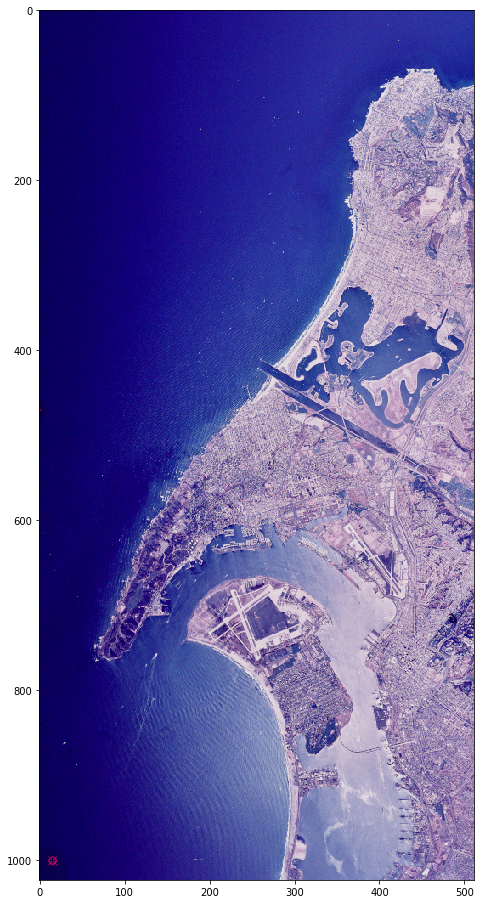

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.figure(figsize=(24,16))
plt.imshow(RGB)
plt.show()

In [4]:
R = RGB.copy()
R[:,:,1] = 0
R[:,:,2] = 0
G = RGB.copy()
G[:,:,0] = 0
G[:,:,2] = 0
B = RGB.copy()
B[:,:,0] = 0
B[:,:,1] = 0

In [21]:
R

Image([[[ 11,   0,   0],
        [ 18,   0,   0],
        [  4,   0,   0],
        ...,
        [ 34,   0,   0],
        [ 40,   0,   0],
        [ 41,   0,   0]],

       [[ 11,   0,   0],
        [  3,   0,   0],
        [  0,   0,   0],
        ...,
        [ 43,   0,   0],
        [ 50,   0,   0],
        [ 45,   0,   0]],

       [[  3,   0,   0],
        [  6,   0,   0],
        [  3,   0,   0],
        ...,
        [ 37,   0,   0],
        [ 47,   0,   0],
        [ 41,   0,   0]],

       ...,

       [[  9,   0,   0],
        [  4,   0,   0],
        [  5,   0,   0],
        ...,
        [141,   0,   0],
        [147,   0,   0],
        [152,   0,   0]],

       [[  0,   0,   0],
        [  2,   0,   0],
        [ 12,   0,   0],
        ...,
        [151,   0,   0],
        [135,   0,   0],
        [138,   0,   0]],

       [[  8,   0,   0],
        [  4,   0,   0],
        [ 11,   0,   0],
        ...,
        [181,   0,   0],
        [150,   0,   0],
        [137,   0,   0]]

In [22]:
G

Image([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,  46,   0],
        [  0,  57,   0],
        [  0,  54,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,  52,   0],
        [  0,  53,   0],
        [  0,  49,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,  50,   0],
        [  0,  58,   0],
        [  0,  44,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0, 131,   0],
        [  0, 135,   0],
        [  0, 138,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0, 139,   0],
        [  0, 120,   0],
        [  0, 123,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0, 163,   0],
        [  0, 129,   0],
        [  0, 125,   0]]

In [23]:
B

Image([[[  0,   0,  92],
        [  0,   0,  85],
        [  0,   0,  89],
        ...,
        [  0,   0, 158],
        [  0,   0, 163],
        [  0,   0, 163]],

       [[  0,   0,  89],
        [  0,   0,  86],
        [  0,   0,  96],
        ...,
        [  0,   0, 163],
        [  0,   0, 161],
        [  0,   0, 162]],

       [[  0,   0,  89],
        [  0,   0,  85],
        [  0,   0,  84],
        ...,
        [  0,   0, 164],
        [  0,   0, 163],
        [  0,   0, 159]],

       ...,

       [[  0,   0,  77],
        [  0,   0,  71],
        [  0,   0,  78],
        ...,
        [  0,   0, 182],
        [  0,   0, 181],
        [  0,   0, 184]],

       [[  0,   0,  78],
        [  0,   0,  71],
        [  0,   0,  69],
        ...,
        [  0,   0, 178],
        [  0,   0, 172],
        [  0,   0, 177]],

       [[  0,   0,  71],
        [  0,   0,  80],
        [  0,   0,  72],
        ...,
        [  0,   0, 198],
        [  0,   0, 184],
        [  0,   0, 183]]

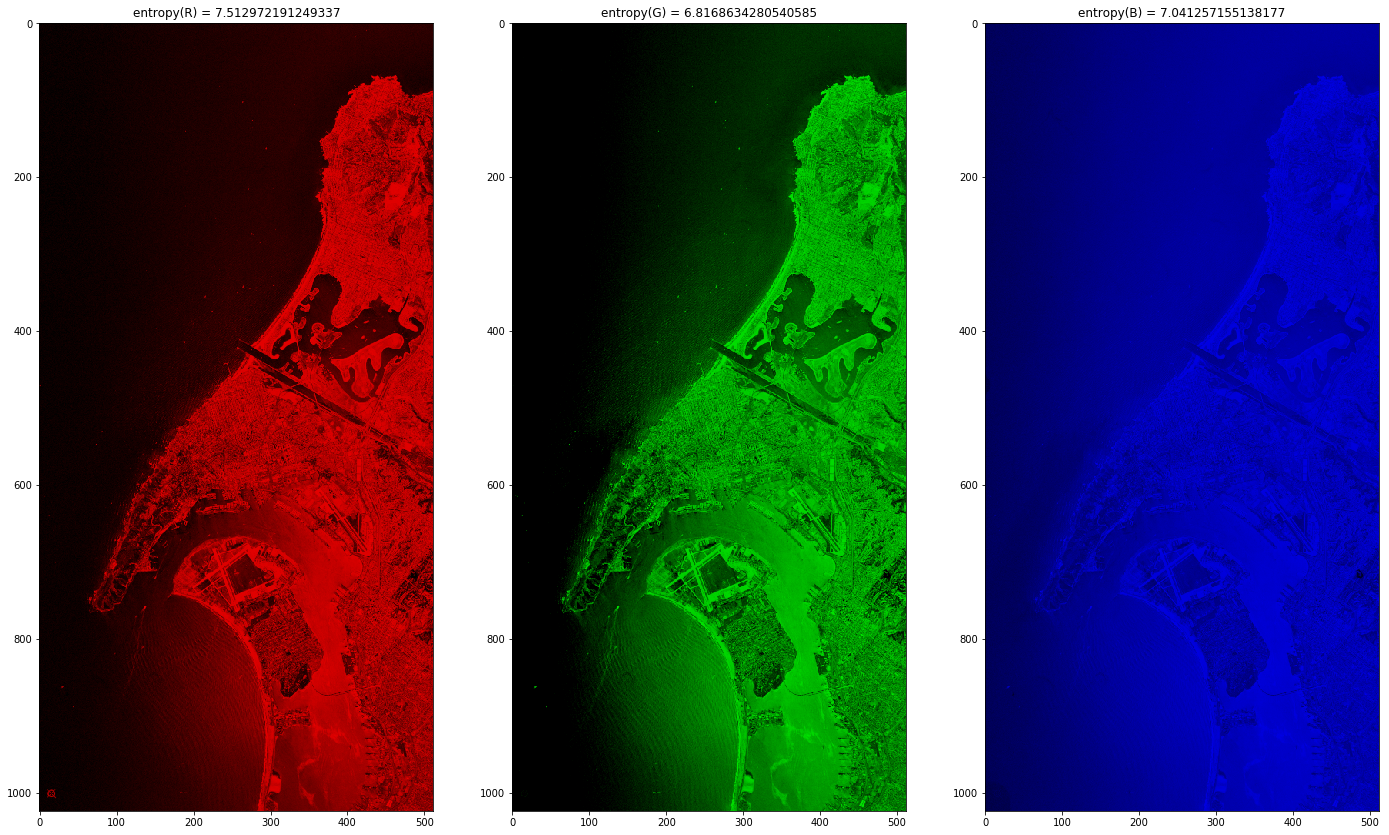

In [5]:
fig = plt.figure(figsize=(24,16))

a = fig.add_subplot(1,3,1) # Rows, cols, subfigure
R_histo = np.histogram(RGB[:,:,0], bins=256)[0] # https://docs.scipy.org/doc/numpy/reference/generated/numpy.histogram.html
R_entropy = entropy(R_histo, base=2) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html
a.set_title("entropy(R) = " + str(R_entropy))
imgplot = plt.imshow(R)

a = fig.add_subplot(1,3,2)
G_histo = np.histogram(RGB[:,:,1], bins=256)[0]
G_entropy = entropy(G_histo, base=2)
a.set_title("entropy(G) = " + str(G_entropy))
imgplot = plt.imshow(G)

a = fig.add_subplot(1,3,3)
B_histo = np.histogram(RGB[:,:,2], bins=256)[0]
B_entropy = entropy(B_histo, base=2)
a.set_title("entropy(B) = " + str(B_entropy))
imgplot = plt.imshow(B)
plt.show()

# See https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111

In [6]:
print('Total entropy = {} bits/pixel'.format(R_entropy + G_entropy + B_entropy))

Total entropy = 21.37109277444157 bits/pixel


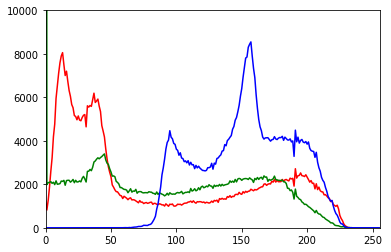

In [24]:
# pip install opencv-python
import cv2
components = ('r','g','b')
histr = [None for col in components]
for i,com in enumerate(components):
    histr[i] = cv2.calcHist([RGB], [i], None, [256], [0,256]) # https://docs.opencv.org/3.4.0/d1/db7/tutorial_py_histogram_begins.html
    plt.plot(histr[i], color = com)
plt.xlim([0,256])
plt.ylim([0,10000])
plt.show()

In [8]:
# https://stackoverflow.com/questions/43983265/rgb-to-yuv-conversion-and-accessing-y-u-and-v-channels
import cv2
import numpy as np

In [9]:
def make_lut_u():
    return np.array([[[i,255-i,0] for i in range(256)]], dtype=np.uint8)

def make_lut_v():
    return np.array([[[0,255-i,i] for i in range(256)]], dtype=np.uint8)

In [10]:
lut_U, lut_V = make_lut_u(), make_lut_v()

In [11]:
lut_U

array([[[  0, 255,   0],
        [  1, 254,   0],
        [  2, 253,   0],
        [  3, 252,   0],
        [  4, 251,   0],
        [  5, 250,   0],
        [  6, 249,   0],
        [  7, 248,   0],
        [  8, 247,   0],
        [  9, 246,   0],
        [ 10, 245,   0],
        [ 11, 244,   0],
        [ 12, 243,   0],
        [ 13, 242,   0],
        [ 14, 241,   0],
        [ 15, 240,   0],
        [ 16, 239,   0],
        [ 17, 238,   0],
        [ 18, 237,   0],
        [ 19, 236,   0],
        [ 20, 235,   0],
        [ 21, 234,   0],
        [ 22, 233,   0],
        [ 23, 232,   0],
        [ 24, 231,   0],
        [ 25, 230,   0],
        [ 26, 229,   0],
        [ 27, 228,   0],
        [ 28, 227,   0],
        [ 29, 226,   0],
        [ 30, 225,   0],
        [ 31, 224,   0],
        [ 32, 223,   0],
        [ 33, 222,   0],
        [ 34, 221,   0],
        [ 35, 220,   0],
        [ 36, 219,   0],
        [ 37, 218,   0],
        [ 38, 217,   0],
        [ 39, 216,   0],


In [12]:
lut_V

array([[[  0, 255,   0],
        [  0, 254,   1],
        [  0, 253,   2],
        [  0, 252,   3],
        [  0, 251,   4],
        [  0, 250,   5],
        [  0, 249,   6],
        [  0, 248,   7],
        [  0, 247,   8],
        [  0, 246,   9],
        [  0, 245,  10],
        [  0, 244,  11],
        [  0, 243,  12],
        [  0, 242,  13],
        [  0, 241,  14],
        [  0, 240,  15],
        [  0, 239,  16],
        [  0, 238,  17],
        [  0, 237,  18],
        [  0, 236,  19],
        [  0, 235,  20],
        [  0, 234,  21],
        [  0, 233,  22],
        [  0, 232,  23],
        [  0, 231,  24],
        [  0, 230,  25],
        [  0, 229,  26],
        [  0, 228,  27],
        [  0, 227,  28],
        [  0, 226,  29],
        [  0, 225,  30],
        [  0, 224,  31],
        [  0, 223,  32],
        [  0, 222,  33],
        [  0, 221,  34],
        [  0, 220,  35],
        [  0, 219,  36],
        [  0, 218,  37],
        [  0, 217,  38],
        [  0, 216,  39],


In [13]:
YUV = cv2.cvtColor(RGB, cv2.COLOR_RGB2YUV) # https://docs.opencv.org/3.4.0/df/d9d/tutorial_py_colorspaces.html

In [14]:
Y, U, V = cv2.split(YUV) # https://docs.opencv.org/3.4.0/d3/df2/tutorial_py_basic_ops.html

In [15]:
Y = cv2.cvtColor(Y, cv2.COLOR_GRAY2RGB)
U = cv2.cvtColor(U, cv2.COLOR_GRAY2RGB)
V = cv2.cvtColor(V, cv2.COLOR_GRAY2RGB)

In [16]:
# Define color palette for U_mapped and V_mapped
U_mapped = cv2.LUT(U, lut_U) # https://docs.opencv.org/3.0-beta/modules/core/doc/operations_on_arrays.html#lut
V_mapped = cv2.LUT(V, lut_V)

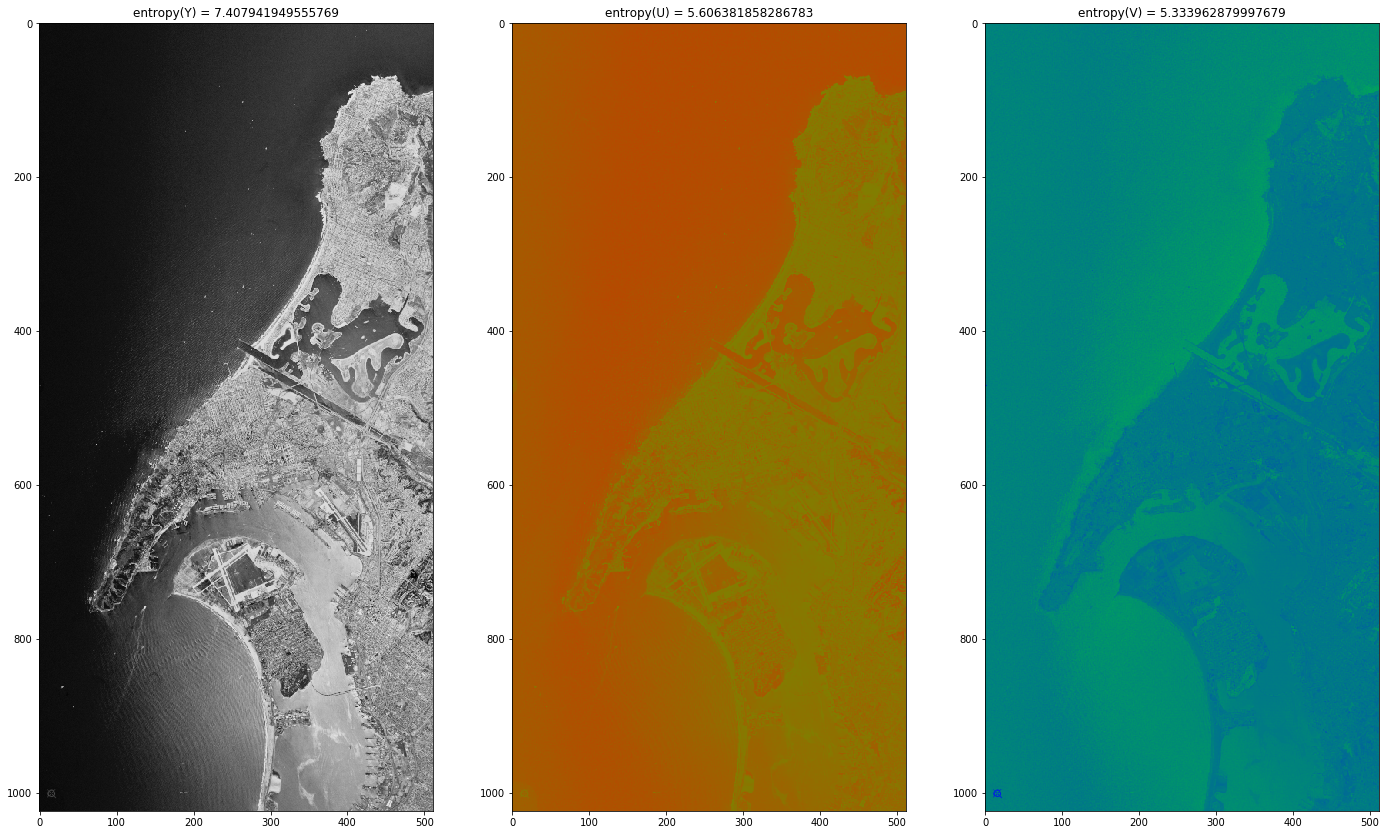

In [25]:
fig = plt.figure(figsize=(24,16))

a = fig.add_subplot(1,3,1) # Rows, cols, subfigure
Y_histo = np.histogram(Y, bins=256)[0]
Y_entropy = entropy(Y_histo, base=2)
a.set_title("entropy(Y) = " + str(Y_entropy))
imgplot = plt.imshow(Y)

a = fig.add_subplot(1,3,2)
U_histo = np.histogram(U, bins=256)[0]
U_entropy = entropy(U_histo, base=2)
a.set_title("entropy(U) = " + str(U_entropy))
imgplot = plt.imshow(U_mapped)

a = fig.add_subplot(1,3,3)
V_histo = np.histogram(V, bins=256)[0]
V_entropy = entropy(V_histo, base=2)
a.set_title("entropy(V) = " + str(V_entropy))
imgplot = plt.imshow(V_mapped)

plt.show()

In [26]:
print('Total entropy = {} bits/pixel'.format(Y_entropy + U_entropy + V_entropy))

Total entropy = 18.34828668784023 bits/pixel


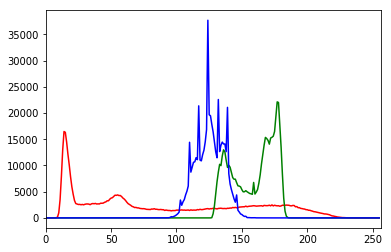

In [27]:
histr = [None for com in components]
for i,com in enumerate(components):
    histr[i] = cv2.calcHist([YUV],[i],None,[256],[0,256])
    plt.plot(histr[i], color = com)
plt.xlim([0,256])
plt.show()

### Chrominance subsampling<a id='chroma_subsamplig'></a>

[The human visual system is more sensitive to the luma (Y) than to the chroma (UV)](https://en.wikipedia.org/wiki/Chroma_subsampling). This means than the chroma can be subsampled without a signiﬁcant loss of quality in the images.

<img src="figs/color_subsampling.svg" width=600>

In [28]:
# pip install PyWavelets
import pywt

In [30]:
def subsample_chroma(image, levels):
    subsampled = np.ndarray((image.shape[0], image.shape[1], 3), 'uint8')
    
    # Luma
    subsampled[:,:,0] = image[:,:,0] # Copy only first component

    # Chroma Cb
    DWT_coeffs = pywt.wavedec2(image[:,:,1], 'bior3.5', level=levels)
    for i in range(levels-1):
        DWT_coeffs[i+1][0][:,:] = 0.0 # "Delete" LH subbands
        DWT_coeffs[i+1][1][:,:] = 0.0 # "Delete" HL subbands
        DWT_coeffs[i+1][2][:,:] = 0.0 # "Delete" HH subbands

    subsampled[:,:,1] = pywt.waverec2(DWT_coeffs, 'bior3.5')
                  
    # Chroma Cb
    DWT_coeffs = pywt.wavedec2(image[:,:,2], 'bior3.5', level=levels)
    for i in range(levels-1):
        DWT_coeffs[i+1][0][:,:] = 0.0 # "Delete" LH subbands
        DWT_coeffs[i+1][1][:,:] = 0.0 # "Delete" HL subbands
        DWT_coeffs[i+1][2][:,:] = 0.0 # "Delete" HH subbands
    subsampled[:,:,2] = pywt.waverec2(DWT_coeffs, 'bior3.5')

    return (subsampled, (subsampled.shape[0], subsampled.shape[1]), DWT_coeffs[0].shape)

In [31]:
chroma_subsampled_YUV, luma_shape, chroma_shape = subsample_chroma(YUV, 5)
print("Luma shape =", luma_shape, "pixels\nChroma shape =", chroma_shape, "coefficients")

Luma shape = (1024, 512) pixels
Chroma shape = (42, 26) coefficients


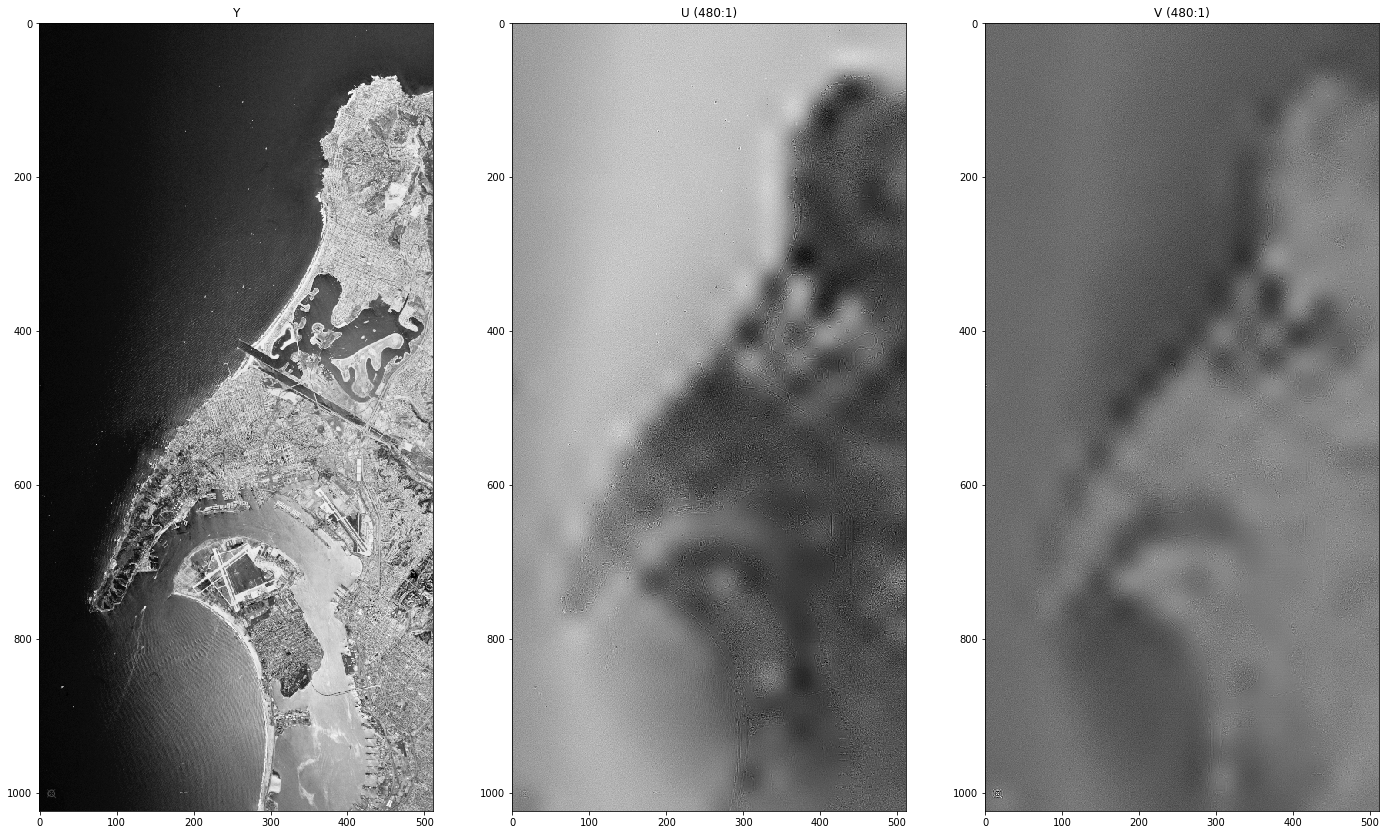

In [32]:
fig = plt.figure(figsize=(24,16))

a = fig.add_subplot(1,3,1) # Rows, cols, subfigure
a.set_title("Y")
imgplot = plt.imshow(chroma_subsampled_YUV[:,:,0], cmap='gray')

a = fig.add_subplot(1,3,2)
a.set_title("U (480:1)")
imgplot = plt.imshow(chroma_subsampled_YUV[:,:,1], cmap='gray')

a = fig.add_subplot(1,3,3)
a.set_title("V (480:1)")
imgplot = plt.imshow(chroma_subsampled_YUV[:,:,2], cmap='gray')

plt.show()
#plt.imshow(chroma_subsampled_YUV[:,:,1], cmap='gray' # Shows U
#plt.show()

In [33]:
chroma_subsampled_RGB = cv2.cvtColor(chroma_subsampled_YUV, cv2.COLOR_YUV2RGB)

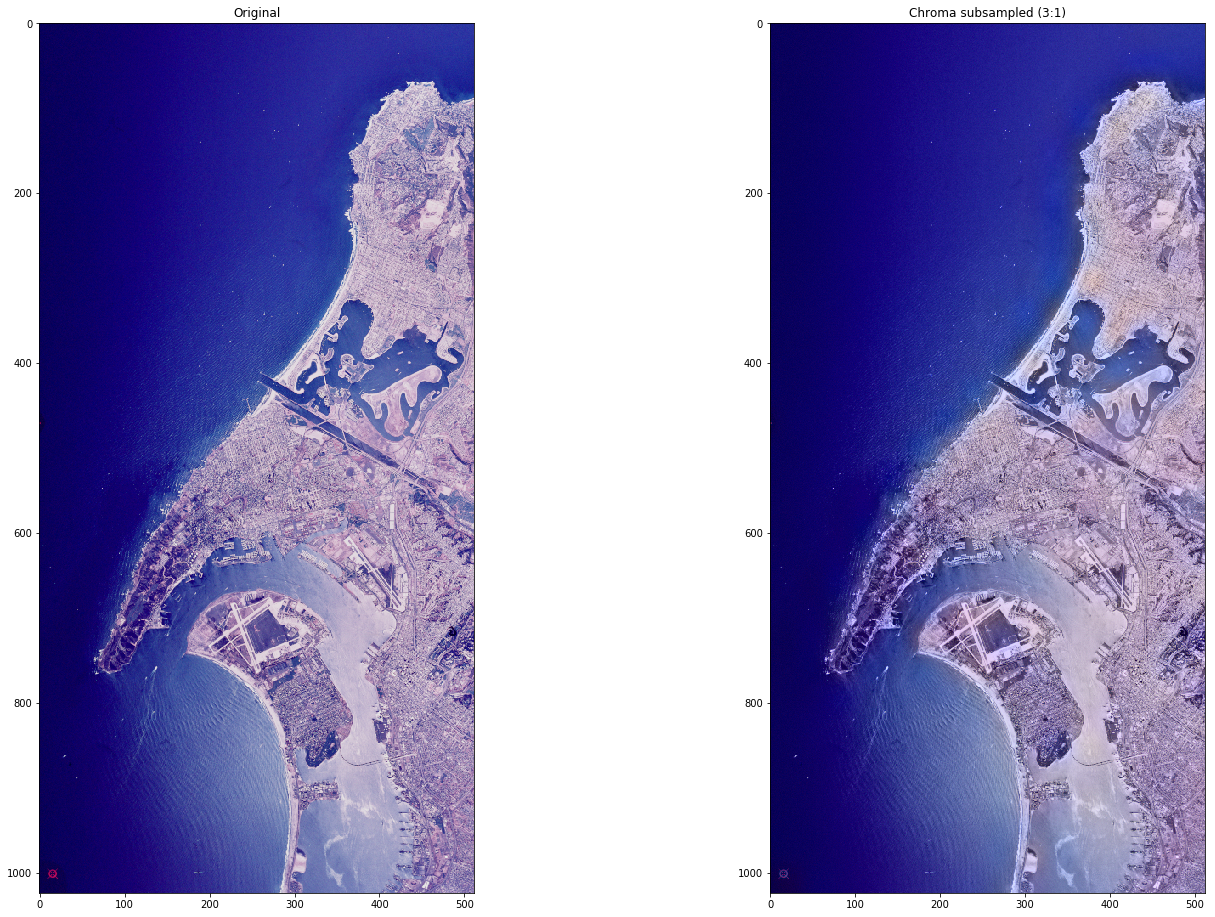

In [34]:
fig = plt.figure(figsize=(24,16))

a = fig.add_subplot(1,2,1) # Rows, cols, subfigure
a.set_title("Original")
plt.imshow(RGB)

a = fig.add_subplot(1,2,2) # Rows, cols, subfigure
a.set_title("Chroma subsampled (3:1)")
plt.imshow(chroma_subsampled_RGB)

plt.show()

In [35]:
print("The original image uses ", \
      luma_shape[0]*luma_shape[1] * 3,
      "bytes"
     )
print("The subsampled image uses", \
      luma_shape[0]*luma_shape[1] +
      chroma_shape[0]*chroma_shape[1] * 2,
      "bytes"
     )

The original image uses  1572864 bytes
The subsampled image uses 526472 bytes


## Orthogonal transform

* The rows of $A$ ($a_{k,*}$) are refered to as the *basis vectors* of the transform, and form an *orthogonal* basis set. The rows can be also seen as the coefficients of $B$ filters, being the first one ($i=0$) the "low-pass" one, which will produce the DC coefficient, and the rest ($i\geq 1$) the "high-pass" filters,  which will generate the AC (Alternating Current) coeffs. These $B$ filters form a filter-bank where the overlapping between the frequency response of the filters should be as small as possible if we want maximum energy compaction.

## Orthonormal transform

* If the basis vectors of a orthogonal transform are unit vectors, the transform is said orthonoral.

* For orthonormal transforms, it holds that

  \begin{equation}
    A^{-1} = A^T.
  \end{equation}

  Therefore, the pair of transforms can be written as
  
  \begin{equation}
    \begin{array}{l}
      S=As \\
      s=A^TS.
    \end{array}
  \end{equation}

## Unitary transform

* Orthonormal transforms are energy preserving and therefore, unitary:

  \begin{equation}
    \sum_{k=0}^{B-1} S[k]^2 = \sum_{n=0}^{B-1}s[n]^2.
  \end{equation}
  
### Proof

\begin{equation}
  \sum_{k=0}^{B-1} S[k]^2 = S^TS = (As)^TAs = s^TA^TAs = s^TIs = s^Ts = \sum_{n=0}^{B-1}s[n]^2.
\end{equation}

## Coding gain

* The coding gain measures the compaction level of the transform, which is defined as

  \begin{equation}
    G=\frac{\frac{1}{B}\displaystyle\sum_{m=0}^{B-1}\sigma_{S[k]}^2}{\sqrt[B]{\displaystyle\prod_{m=0}^{B-1}\sigma_{S[k]}^2}},
  \end{equation}
  
  where $\sigma_{S[k]}^2$ is the variance of coeff $S[k]$.

## Karhunen-Loéve transform (KLT)

* For the KLT, the rows of $A$ (the basis of the forward transform) are the eigenvectors of the autorrelation matrix $R$ of the signal $s$. The $(i,j)$-th element of $R$ is defined as:

  \begin{equation}
    R_{i,j} = \text{E}\big(s[n]s[n+|i-j|]\big).
  \end{equation}
  
* It can be proven that KLT minimizes $\sqrt[B]{\prod_{k=0}^{B-1}\sigma_{S[k]}^2}$, and therefore, it provides the maximum coding gain. Unfortunately, the basis fuctions of the KLT depends on $s$ if it is non-[stationary](https://en.wikipedia.org/wiki/Stationary_process) and in this case, the autocorrelation matrix (or the basis) must be sent to the decoder (to run the inverse transform) as side information. However, if $B=2$, the KLT is

  \begin{equation}
    A_{\text{2-KLT}} = \frac{1}{\sqrt{2}}
    \left[
      \begin{array}{cc}
        1 & 1 \\
        1 & -1
      \end{array}
    \right]
  \end{equation}
  
  for all signals.

## DCT (Discrete Cosine Transform)<a id='DCT'></a>

### Definition

* The forward (direct) transform is

  \begin{equation}
    \text{DCT}[u] = \frac{\sqrt{2}}{\sqrt{N}}
    K(u)\sum_{n=0}^{N-1} s[n]\cos\frac{(2n+1)\pi u}{2n},
  \end{equation}

  and the backward (inverse) transform is

  \begin{equation}
    s[n] = \frac{\sqrt{2}}{\sqrt{N}}
    \sum_{u=0}^{N-1} K(u)\text{DCT}[u]\cos\frac{(2n+1)\pi u}{2n},
  \end{equation}

  where $N$ is the number of pixels, and $s[n]$ denotes the $n$-th pixel
  of the image $s$, and

  \begin{equation}
    K(u) =
    \left\{
      \begin{array}{ll}
      \frac{1}{\sqrt{2}} & \text{si}~u=0\\
        1 & \text{if}~u>0.
      \end{array}
      \right.
  \end{equation}

### Properties

1. **Separable**: the $D$-dimensional DCT can be computed using the $1$D DCT in each possible dimension.
2. In general, **high energy compaction**: a small number of DCT coefficients can reconstruct with a reasonable accuracy the original signal.
3. **Unitary**: the energy of the DCT coefficients is proportional to the energy of the samples.
4. **Orthonormality**: DCT basis are orthonormal (orthogonal + unitary) and therefore, DCT coefficients are uncorrelated.

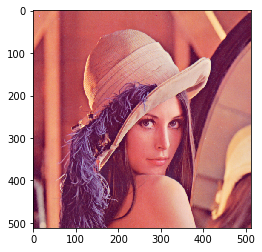

In [36]:
# Load lena

import urllib.request
from matplotlib import pyplot as plt
import numpy as np
import cv2

%matplotlib inline
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BRG = cv2.imdecode(arr,-1)
RGB = cv2.cvtColor(BRG, cv2.COLOR_BGR2RGB)
plt.imshow(RGB)

In [ ]:
from scipy import fftpack
from PIL import Image

# Forward and backward DCT wrappers

def forward_2d_dct(img):
    """ Get 2D Cosine Transform of Image
    """
    return fftpack.dct(fftpack.dct(img.T, norm='ortho').T, norm='ortho')

def inverse_2d_dct(coefficients):
    """ Get 2D Inverse Cosine Transform of Image
    """
    return fftpack.idct(fftpack.idct(coefficients.T, norm='ortho').T, norm='ortho')

In [ ]:
# Color 2D-DCT is the 2D-DCT of each component
components = ('r','g','b')
dct = [None]*3
for i,com in enumerate(components):
    print("{} ".format(i), end='')
    dct[i] = forward_2d_dct(RGB[:,:,i])

In [ ]:
# View DCT coefs
view_dct = np.empty(RGB.shape)
for i,com in enumerate(components):
    view_dct[:,:,i] = dct[i][:,:]
plt.imshow((view_dct - view_dct.min())/(view_dct.max() - view_dct.min())*255)

In [ ]:
# Reconstruct with biggest DCT coefs
N = 100 # Step size (in coeffs) for each reconstruction
for k in range(32): # Up to 32 reconstructions
    
    coeffs_indexes = np.empty((RGB.shape[0] * RGB.shape[1]), dtype='float, int, int')
    for i in range(RGB.shape[0]):
        for j in range(RGB.shape[1]):
            coeffs_indexes[i*RGB.shape[1]+j] = (np.abs(dct[0][i][j]), i, j)
            
    sorted = np.sort(coeffs_indexes, axis = -1)[::-1]
    
    x_coords = np.empty((k+1)*N, dtype='int')
    y_coords = np.empty((k+1)*N, dtype='int')
    for kk in range((k+1)*N):
        x_coords[kk] = sorted[kk][1]
        y_coords[kk] = sorted[kk][2]

    recons = np.empty(RGB.shape)
    
    dct_copy = np.zeros(dct[0].shape)

    dct_copy[x_coords, y_coords] = dct[0][x_coords, y_coords]
    recons_ = inverse_2d_dct(dct_copy)
    recons[:,:,0] = recons_[:,:].clip(0,255)
    
    dct_copy = np.empty_like(dct[1])
    dct_copy[x_coords, y_coords] = dct[1][x_coords, y_coords]
    recons_ = inverse_2d_dct(dct_copy)
    recons[:,:,1] = recons_[:,:].clip(0,255)

    dct_copy = np.empty_like(dct[2])
    dct_copy[x_coords, y_coords] = dct[2][x_coords, y_coords]
    recons_ = inverse_2d_dct(dct_copy)
    recons[:,:,2] = recons_[:,:].clip(0,255)
    
    plt.imshow(recons.astype('uint8'))
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);
    print("{} coefficients".format((k+1)*N), end='')
    plt.show()


## $8\times 8$ DCT

* DCT exhibits a bad performance when applied to high resolution images, but locally it works pretty well. For this reason, most DCT-based image/video codecs divide the images in blocks (typically of 8x8 pixels) and apply the DCT to each block, independently. Let's see the basis functions (the synthesys filters) of the 2D-DCT.

In [ ]:
fig = plt.figure(figsize=(16, 16))
for i in range(8):
    for j in range(8):
        dct_copy = np.zeros((8, 8))

        dct_copy[i][j] = 1.0
        recons = inverse_2d_dct(dct_copy)
        
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255

        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

## Dyadic DWT (Discrete Wavelet Transform)<a id='DWT'></a>

Key features:

1. **High spectral compaction**, specially when transient signals are present.
2. **Multiresolution representation**: it is easy to recover a reduced version of the original image if only a sub-set of the coeﬃcients is proccesed.

### Filters bank implementation

<img src="figs/QMF.svg">

Where:
\begin{equation}
  S = (\uparrow^2(L)*s_L) + (\uparrow^2(H)*s_H)
\end{equation}
and
\begin{equation}
  \begin{array}{rcl}
    L & = & \downarrow^2(S*a_L) \\
    H & = & \downarrow^2(S*a_H).
  \end{array}
\end{equation}


Comments:

1. $a_L$ and $a_H$ are the transfer function (the transfer function of a filter is the response of that filter to the unitary impulse function (Dirac's delta))  of a low-pass filter and high-pass filter, respectively, that have been designed to be complementary (ideally, in $L$ we only found the frequencies of $S$ that are not in $H$, and viceversa). When this is true, it is said the we are using a Perfect Reconstruction Quadrature Mirror Filter bank and the DWT is biorthogonal.

2. In the wavelet theory, $s_L$ is named the *scale function* and $s_H$ the *mother function* or *wavelet basis function*. The coefficients of $L$ are also knwon as the *scale coeffients* and the coeffcientes of $H$ the *wavelet coefficients* [[Sovic & Sersic, 2012]](https://scholar.google.es/scholar?hl=en&as_sdt=0%2C5&q=Ana+Sovic+and+Damir+Sersic.+Signal+decomposition+methods+for+reducind+drawbacks+of+the+dwt&btnG=).

3. $\downarrow^2(\cdot)$ and $\uparrow^2(\cdot)$ donote the
  subsampling and oversampling operations:
  
  \begin{equation}
    (\downarrow^2(S))_i = S_{2i}
  \end{equation}
  
  and
  
  \begin{equation}
    (\uparrow^2(S))_i =
  \left\{
  \begin{array}{ll}
    S_{i/2} & \text{if $i$ if even} \\
    0 & \text{otherwise}.
  \end{array}
  \right.
  \end{equation}
  
  where $S_i$ if the $i$-th sample of $S$.
  
4. $*$ is the convolution operator.

5. Notice that half of the filtered samples are wasted.

### Lifting implementation [[Sweldens & Schröder, 2000)]](https://scholar.google.es/scholar?hl=es&as_sdt=0%2C5&q=building+wavelets+at+home&btnG=)

<img src="figs/lifting.svg">

Comments:

1.
\begin{equation}
  H_i = S_{2i+1} - {\cal P}(\{S_{2i}\})_i
  \tag{PredictionStep}
  \label{eq:PredictionStep}
\end{equation}

\begin{equation}
  L_i = S_{2i} + \{{\cal U}(H)\}_i
  \tag{UpdateStep}
  \label{eq:UpdateStep}
\end{equation}

2. Subsampled signals $\{S_{2i}\}$ and $\{S_{2i+1}\}$ can been computed by using

\begin{equation*}
   \{S_{2i+1}\} = \downarrow^2(Z^{-1}(S))
\end{equation*}

and

\begin{equation*}
   \{S_{2i}\} = \downarrow^2(S),
\end{equation*}

where $Z^{-1}$ represents the one sample delay function.

3. $H$ has tipically less energy and entropy than $\{S_{2i+1}\}$.
4. $L$ has less aliasing than $\{S_{2i}\}$ (notice that $L$ has not
  been low-pass filtered before subsampling it).

### $T$-levels 1D-DWT

<img src="figs/n_levels_dwt1d.svg">

### 2D-DWT

* The one-dimensional (1D) DWT is a separable transform. Therefore, the 2D DWT can be computed applying the DWT to all the rows of an image and next, to all the columns, or viceversa.

<img src="figs/2D-DWT.svg">

* The contribution of a coefficient of a subband $b$ is determined by the DWT basis fuction ${s_H}^b$ asociated to that coefficient, which can be empirically determined by applying the inverse DWT to the Dirac Impulse function localized in that coefficient (notice that ${s_H}^b$ does not depend on the coefficient because we are supposing that all the coefficients of a subband have the same contribution, the same basis fuction) [[Rabbani, Joshi & Jones, 2009]](https://scholar.google.es/scholar?hl=es&as_sdt=0%2C5&q=Majid+Rabban%2C+Rajan+L.+Joshi%2C+and+Paul+W.+Jones.+The+JPEG+2000+Suite%2C+chapter+JPEG+2000+Core+Coding+System+%28Part+1%29.+WILEY%2C+2009&btnG=). Therefore, the  <a href="https://en.wikipedia.org/wiki/Norm_(mathematics)#Euclidean_norm">L$_2$-norm</a> for the subband $b$ is computed as the energy of a basis function of that subband as

\begin{equation}
  E({s_H}^b) = \sum_i{|{s_H}^b_i|}^2.
\end{equation}

In the case of the 5/3-DWT, the L$_2$-norms of the DWT subbands are:

<img src="figs/factores_5_3_L2_norm.svg">

### Haar filters [[Haar, 1910]](https://scholar.google.es/scholar?hl=es&as_sdt=0%2C5&q=A.+Haar.+Zur+Theorie+der+orthogolanen+Funktionen-Systeme.+Mathematische+Annalen%2C+69%3A331%E2%80%93371%2C+1910&btnG=)

The $i$-th sample of the low-frequency subband is computed (using a filter plus subsampling) as

\begin{equation}
  L_i=\frac{S_{2i}+S_{2i+1}}{2},
  \tag{HaarL}
  \label{eq:Haar_A-LPF}
\end{equation}

and the $i$-th sample of the high-frequency subband as

\begin{equation}
  H_i=S_{2i+1}-S_{2i}.
  \tag{HaarH}
  \label{eq:Haar_A-HPF}
\end{equation}

If Lifting is used,

\begin{equation}
  L_i=S_{2i}+\frac{H_i}{2}.
  \tag{HaarLLifted}
  \label{eq:Haar_A-LPF-lifting}
\end{equation}

Notice that $H_i=0$ if $S_{2i+1}=S_{2i}$, therefore, the Haar transform is good to encode constant signals. The notation X/Y indicates the length (taps or number of coefficients) of the low-pass and the high-pass (convolution) filters of the filter bank implementation (not Lifting), respectively.

#### 2D basis functions

In [ ]:
# pip install pywavelets
import pywt
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure(figsize=(16, 16))
wavelet_= 'haar'

for i in range(4):
    for j in range(4):

        pixels = np.zeros((32, 32))
        #coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, mode='per', level=3)
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        #print(coeffs[0].shape)
        coeffs[0][i, j] = 1.0
#for i in range(len(coeffs)-1):
    #print(i)
    #coeffs[i+1][0][1, 1] = 1.0
    #coeffs[i+1][1][1, 1] = 1.0
    #coeffs[i+1][2][1, 1] = 1.0
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);
#plt.subplot(1, 1, 1)
#plt.imshow(recons, cmap='gray')

In [ ]:
# pip install pywavelets
import pywt
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure(figsize=(16, 16))
wavelet_= 'haar'

for i in range(4):
    for j in range(4):

        pixels = np.zeros((32, 32))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[1][0][i, j] = 1.0
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

In [ ]:
import pywt # pip install pywavelets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure(figsize=(16, 16))
wavelet_= 'haar'

for i in range(4):
    for j in range(4):

        pixels = np.zeros((32, 32))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[1][1][i, j] = 1.0
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

In [ ]:
import pywt # pip install pywavelets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure(figsize=(16, 16))
wavelet_= 'haar'

for i in range(4):
    for j in range(4):

        pixels = np.zeros((32, 32))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[1][2][i, j] = 1.0
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

In [ ]:
import pywt # pip install pywavelets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure(figsize=(16, 16))
wavelet_= 'haar'

for i in range(8):
    for j in range(8):

        pixels = np.zeros((32, 32))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[2][0][i, j] = 1.0
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(16, 16, 16*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

In [ ]:
# Load lena

import urllib.request
from matplotlib import pyplot as plt
import numpy as np
import cv2 # pip install opencv-python

%matplotlib inline
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BRG = cv2.imdecode(arr,-1)
pixels = cv2.cvtColor(BRG, cv2.COLOR_BGR2RGB)
plt.imshow(pixels)

In [ ]:
# Color 2D-DWT is the 2D-DWT of each component
components = ('r','g','b')
coeffs = [None]*3
wavelet_= 'haar'
levels_ = 5
for i,com in enumerate(components):
    print("{} ".format(i), end='')
    coeffs[i] = pywt.wavedec2(pixels[:,:,i], wavelet=wavelet_, level=levels_)

In [ ]:
# View DWT coefs

fig = plt.figure(figsize=(16, 16))

view = np.empty(pixels.shape, 'uint8')

# LL subband
for i,com in enumerate(components):
    x = coeffs[i][0][:,:]
    y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
    view[0:coeffs[i][0].shape[0],
         0:coeffs[i][0].shape[1],
         i] = y

for l in range(levels_):

    # LH
    for i,com in enumerate(components):
        x = coeffs[i][l+1][0][:,:]
        y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
        view[0:coeffs[i][l+1][0].shape[0],
             coeffs[i][l+1][0].shape[1]:coeffs[i][l+1][0].shape[1]*2,
             i] = y

    # HH
    for i,com in enumerate(components):
        x = coeffs[i][l+1][1][:,:]
        y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
        view[coeffs[i][l+1][1].shape[0]:coeffs[i][l+1][1].shape[0]*2,
             0:coeffs[i][l+1][1].shape[1],
             i] = y

    # HH
    for i,com in enumerate(components):
        x = coeffs[i][l+1][2][:,:]
        y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
        view[coeffs[i][l+1][2].shape[0]:coeffs[i][l+1][2].shape[0]*2,
             coeffs[i][l+1][2].shape[1]:coeffs[i][l+1][2].shape[1]*2,
             i] = y

plt.subplot(1, 1, 1)
plt.imshow(view)

In [ ]:
recons_ = pywt.waverec2(coeffs[0], wavelet=wavelet_)
max = recons_.max()
min = recons_.min()
if(max!=min):
    recons = (recons_-min)/(max-min)*255

# Visualize
fig = plt.figure(figsize=(16, 16))

plt.imshow(recons, cmap=plt.cm.gray)
plt.grid(False);
plt.xticks([]);
plt.yticks([]);
plt.show()

In [ ]:
recons = np.empty(pixels.shape)

recons[:,:,0] = pywt.waverec2(coeffs[0], wavelet=wavelet_)
recons[:,:,1] = pywt.waverec2(coeffs[1], wavelet=wavelet_)
recons[:,:,2] = pywt.waverec2(coeffs[2], wavelet=wavelet_)
max = recons.max()
min = recons.min()
if(max!=min):
    recons = ((recons-min)/(max-min)*255).astype('uint8')
                      
# Visualize
print(recons.max(), recons.min())
plt.imshow(recons)
plt.grid(False);
plt.xticks([]);
plt.yticks([]);
plt.show()

### Progressive transmission

In [ ]:
# Reconstruct with biggest DWT coefs
recons = np.empty(pixels.shape)

N = 100 # Step size (in coeffs) for each reconstruction
for k in range(10): # Up to 32 reconstructions

    coeffs_indexes = np.empty((pixels.shape[0] * pixels.shape[1]),
                            dtype='float, int, int, int, int')
                            # Coeff, level, subband, coor_x, coor_y

    # Process only the R component to find the higher coeffs
    
    offset = 0
    
    # LL
    for x in range(coeffs[0][0].shape[0]):
        for y in range(coeffs[0][0].shape[1]):
            coeffs_indexes[offset] = (np.abs(coeffs[0][0][x][y]), 0, 0, x, y)
            offset += 1
    
    # Rest of subbands
    for l in range(levels_):
        for s in range(3):
            for x in range(coeffs[0][l+1][s].shape[0]):
                for y in range(coeffs[0][l+1][s].shape[1]):
                    coeffs_indexes[offset] = (np.abs(coeffs[0][l+1][s][x][y]), (l+1), s, x, y)
                    offset += 1

    sorted = np.zeros((pixels.shape[0] * pixels.shape[1]), dtype='float, int, int, int, int')
    sorted = np.sort(coeffs_indexes)[::-1]

    # Reconstruct R

    # An "empty" transformed structure

    zeros = np.zeros((pixels.shape[0], pixels.shape[1]))
    filtered_coeffs = pywt.wavedec2(zeros, wavelet=wavelet_, level=levels_)

    # Copy some coeffs
    for kk in range((k+1)*N):
        if sorted[kk][1] == 0:
            filtered_coeffs[0][sorted[kk][3], sorted[kk][4]] = \
            coeffs[0][0][sorted[kk][3], sorted[kk][4]]
        else:
            #print(kk, sorted[kk][1], sorted[kk][2], sorted[kk][3], sorted[kk][4])
            filtered_coeffs[sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]] = \
            coeffs[0][sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]]
        
    recons_ = pywt.waverec2(filtered_coeffs, wavelet=wavelet_)
    recons[:,:,0] = recons_

    # Reconstruct G

    # An "empty" transformed structure

    zeros = np.zeros((pixels.shape[0], pixels.shape[1]))
    filtered_coeffs = pywt.wavedec2(zeros, wavelet=wavelet_, level=levels_)

    # Copy some coeffs
    for kk in range((k+1)*N):
        if sorted[kk][1] == 0:
            filtered_coeffs[0][sorted[kk][3], sorted[kk][4]] = \
            coeffs[1][0][sorted[kk][3], sorted[kk][4]]
        else:
            filtered_coeffs[sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]] = \
            coeffs[1][sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]]
        
    recons_ = pywt.waverec2(filtered_coeffs, wavelet=wavelet_)
    recons[:,:,1] = recons_
    
    # Reconstruct B

    # An "empty" transformed structure
    zeros = np.zeros((pixels.shape[0], pixels.shape[1]))
    filtered_coeffs = pywt.wavedec2(zeros, wavelet=wavelet_, level=levels_)

    # Copy some coeffs
    for kk in range((k+1)*N):
        if sorted[kk][1] == 0:
            filtered_coeffs[0][sorted[kk][3], sorted[kk][4]] = \
            coeffs[2][0][sorted[kk][3], sorted[kk][4]]
        else:
            filtered_coeffs[sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]] = \
            coeffs[2][sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]]

    recons_ = pywt.waverec2(filtered_coeffs, wavelet=wavelet_)
    recons[:,:,2] = recons_
                      
    max = recons.max()
    min = recons.min()
    if(max!=min):
        recons = ((recons-min)/(max-min)*255).astype('uint8')

    # Visualize
    plt.imshow(recons)
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);
    print("{} coefficients".format((k+1)*N), end='')
    plt.show()

### 5/3 (linear) filters [[Sweldens & Schröder, 2000]](https://scholar.google.es/scholar?hl=es&as_sdt=0%2C5&q=building+wavelets+at+home&btnG==)

The $i$-th sample of the low-frequency subband (using a filter-bank implementation) is

\begin{equation}
  L_i=-\frac{1}{8}S_{2i-2}+\frac{1}{4}S_{2i-1}+\frac{3}{4}S_{2i}
  +\frac{1}{4}S_{2i+1}-\frac{1}{8}S_{2i+2}
  \tag{5/3L}
  \label{eq:Lineal_A-LPF}
\end{equation}

and the $i$-th sample of the high-frequency signal is computed by

\begin{equation}
  H_i=S_{2i+1}-\frac{S_{2i}+S_{2i+2}}{2},
  \tag{5/3H}
  \label{eq:Lineal_A-HPF}

that, if we use Lifting, it can be also computed using less operations by

\begin{equation}
  L_i=S_{2i}+\frac{H_{i-1}+H_i}{4}.
  \tag{5/3LLifted}
  \label{eq:Lineal_A-LPF_lifting}
\end{equation}

Notice that $H_i=0$ if $S_{2i+1}=(S_{2i}+S_{2i+2})/2$. Therefore, the 5/3 transform is suitable to encode lineally piece-wised signals.

#### 2D basis functions

In [ ]:
import pywt # pip install pywavelets
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

fig = plt.figure(figsize=(16, 16))
wavelet_= 'bior2.2'

for i in range(4):
    for j in range(4):

        pixels = np.zeros((64, 64))
        #coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, mode='per', level=3)
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        #print(coeffs[0].shape)
        coeffs[0][i, j] = 1.0
#for i in range(len(coeffs)-1):
    #print(i)
    #coeffs[i+1][0][1, 1] = 1.0
    #coeffs[i+1][1][1, 1] = 1.0
    #coeffs[i+1][2][1, 1] = 1.0
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);
#plt.subplot(1, 1, 1)
#plt.imshow(recons, cmap='gray')

In [ ]:
fig = plt.figure(figsize=(16, 16))

for i in range(4):
    for j in range(4):

        pixels = np.zeros((64, 64))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[1][0][i, j] = 1.0
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

In [ ]:
fig = plt.figure(figsize=(16, 16))

for i in range(4):
    for j in range(4):

        pixels = np.zeros((64, 64))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[1][1][i, j] = 1.0
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

In [ ]:
fig = plt.figure(figsize=(16, 16))

for i in range(4):
    for j in range(4):

        pixels = np.zeros((64, 64))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[1][2][i, j] = 1.0
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(8, 8, 8*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

In [ ]:
fig = plt.figure(figsize=(16, 16))

for i in range(8):
    for j in range(8):

        pixels = np.zeros((64, 64))
        coeffs = pywt.wavedec2(pixels, wavelet=wavelet_, level=3)
        coeffs[2][0][i, j] = 1.0
        recons = pywt.waverec2(coeffs, wavelet=wavelet_)
        max = recons.max()
        min = recons.min()
        if(max!=min):
            recons = (recons-min)/(max-min)*255
            
        plt.subplot(16, 16, 16*i+j+1)
        plt.imshow(recons, cmap=plt.cm.gray)
        plt.grid(False);
        plt.xticks([]);
        plt.yticks([]);

In [ ]:
# Load lena

import urllib.request
from matplotlib import pyplot as plt
import numpy as np
import cv2 # pip install opencv-python

%matplotlib inline
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BRG = cv2.imdecode(arr,-1)
pixels = cv2.cvtColor(BRG, cv2.COLOR_BGR2RGB)
plt.imshow(pixels)

In [ ]:
# Color 2D-DWT is the 2D-DWT of each component
components = ('r','g','b')
coeffs = [None]*3
wavelet_= 'bior2.2'
levels_ = 5
for i,com in enumerate(components):
    print("{} ".format(i), end='')
    coeffs[i] = pywt.wavedec2(pixels[:,:,i], wavelet=wavelet_, level=levels_, mode='per')

In [ ]:
# View DWT coefs

fig = plt.figure(figsize=(16, 16))

view = np.empty(pixels.shape, 'uint8')

# LL subband
for i,com in enumerate(components):
    x = coeffs[i][0][:,:]
    y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
    view[0:coeffs[i][0].shape[0],
         0:coeffs[i][0].shape[1],
         i] = y

for l in range(levels_):

    # LH
    for i,com in enumerate(components):
        x = coeffs[i][l+1][0][:,:]
        y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
        view[0:coeffs[i][l+1][0].shape[0],
             coeffs[i][l+1][0].shape[1]:coeffs[i][l+1][0].shape[1]*2,
             i] = y

    # HH
    for i,com in enumerate(components):
        x = coeffs[i][l+1][1][:,:]
        y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
        view[coeffs[i][l+1][1].shape[0]:coeffs[i][l+1][1].shape[0]*2,
             0:coeffs[i][l+1][1].shape[1],
             i] = y

    # HH
    for i,com in enumerate(components):
        x = coeffs[i][l+1][2][:,:]
        y = ((x - x.min()) / (x.max() - x.min())*255).astype('uint8')
        view[coeffs[i][l+1][2].shape[0]:coeffs[i][l+1][2].shape[0]*2,
             coeffs[i][l+1][2].shape[1]:coeffs[i][l+1][2].shape[1]*2,
             i] = y

plt.subplot(1, 1, 1)
plt.imshow(view)

In [ ]:
recons_ = pywt.waverec2(coeffs[0], wavelet=wavelet_, mode='per')
max = recons_.max()
min = recons_.min()
if(max!=min):
    recons = (recons_-min)/(max-min)*255

# Visualize
fig = plt.figure(figsize=(16, 16))

plt.imshow(recons, cmap=plt.cm.gray)
plt.grid(False);
plt.xticks([]);
plt.yticks([]);
plt.show()

In [ ]:
recons = np.empty(pixels.shape)

recons[:,:,0] = pywt.waverec2(coeffs[0], wavelet=wavelet_, mode='per')
recons[:,:,1] = pywt.waverec2(coeffs[1], wavelet=wavelet_, mode='per')
recons[:,:,2] = pywt.waverec2(coeffs[2], wavelet=wavelet_, mode='per')
max = recons.max()
min = recons.min()
if(max!=min):
    recons = ((recons-min)/(max-min)*255).astype('uint8')
                      
# Visualize
print(recons.max(), recons.min())
plt.imshow(recons)
plt.grid(False);
plt.xticks([]);
plt.yticks([]);
plt.show()

### Progressive transmission

In [ ]:
# Reconstruct with biggest DWT coefs
recons = np.empty(pixels.shape)

N = 100 # Step size (in coeffs) for each reconstruction
for k in range(10): # Up to 32 reconstructions

    coeffs_indexes = np.empty((pixels.shape[0] * pixels.shape[1]),
                            dtype='float, int, int, int, int')
                            # Coeff, level, subband, coor_x, coor_y

    # Process only the R component to find the higher coeffs
    
    offset = 0
    
    # LL
    for x in range(coeffs[0][0].shape[0]):
        for y in range(coeffs[0][0].shape[1]):
            coeffs_indexes[offset] = (np.abs(coeffs[0][0][x][y]), 0, 0, x, y)
            offset += 1
    
    # Rest of subbands
    for l in range(levels_):
        for s in range(3):
            for x in range(coeffs[0][l+1][s].shape[0]):
                for y in range(coeffs[0][l+1][s].shape[1]):
                    coeffs_indexes[offset] = (np.abs(coeffs[0][l+1][s][x][y]), (l+1), s, x, y)
                    offset += 1

    sorted = np.zeros((pixels.shape[0] * pixels.shape[1]), dtype='float, int, int, int, int')
    sorted = np.sort(coeffs_indexes)[::-1]

    # Reconstruct R

    # An "empty" transformed structure

    zeros = np.zeros((pixels.shape[0], pixels.shape[1]))
    filtered_coeffs = pywt.wavedec2(zeros, wavelet=wavelet_, level=levels_, mode='per')

    # Copy some coeffs
    for kk in range((k+1)*N):
        if sorted[kk][1] == 0:
            filtered_coeffs[0][sorted[kk][3], sorted[kk][4]] = \
            coeffs[0][0][sorted[kk][3], sorted[kk][4]]
        else:
            #print(kk, sorted[kk][1], sorted[kk][2], sorted[kk][3], sorted[kk][4])
            filtered_coeffs[sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]] = \
            coeffs[0][sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]]
        
    recons_ = pywt.waverec2(filtered_coeffs, wavelet=wavelet_, mode='per')
    recons[:,:,0] = recons_

    # Reconstruct G

    # An "empty" transformed structure

    zeros = np.zeros((pixels.shape[0], pixels.shape[1]))
    filtered_coeffs = pywt.wavedec2(zeros, wavelet=wavelet_, level=levels_, mode='per')

    # Copy some coeffs
    for kk in range((k+1)*N):
        if sorted[kk][1] == 0:
            filtered_coeffs[0][sorted[kk][3], sorted[kk][4]] = \
            coeffs[1][0][sorted[kk][3], sorted[kk][4]]
        else:
            filtered_coeffs[sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]] = \
            coeffs[1][sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]]
        
    recons_ = pywt.waverec2(filtered_coeffs, wavelet=wavelet_, mode='per')
    recons[:,:,1] = recons_
    
    # Reconstruct B

    # An "empty" transformed structure
    zeros = np.zeros((pixels.shape[0], pixels.shape[1]))
    filtered_coeffs = pywt.wavedec2(zeros, wavelet=wavelet_, level=levels_, mode='per')

    # Copy some coeffs
    for kk in range((k+1)*N):
        if sorted[kk][1] == 0:
            filtered_coeffs[0][sorted[kk][3], sorted[kk][4]] = \
            coeffs[2][0][sorted[kk][3], sorted[kk][4]]
        else:
            filtered_coeffs[sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]] = \
            coeffs[2][sorted[kk][1]][sorted[kk][2]][sorted[kk][3], sorted[kk][4]]

    recons_ = pywt.waverec2(filtered_coeffs, wavelet=wavelet_, mode='per')
    recons[:,:,2] = recons_
                      
    max = recons.max()
    min = recons.min()
    if(max!=min):
        recons = ((recons-min)/(max-min)*255).astype('uint8')

    # Visualize
    plt.imshow(recons)
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);
    print("{} coefficients".format((k+1)*N), end='')
    plt.show()

## Quantization in the transform domain

* If the transform is orthogonal, by definition coeffs $S[k]$ are uncorrelated. Therefore, a scalar quantizer can performs an optimal quantization.

## Bit-planes progression<a id='bitplanes_progression'></a>

In [ ]:
!make bit-plane-trans.svg

<img src="bit-plane-trans.svg">

## Bit allocation (bit-rate control)

* In lossless coding, coeffs $S[k]$ are directly encoded using some text compression algorithm or a combination of them.

* However, in most situations, a lossy compression is needed and in this case, a transform coder must determine, given a maximum number of bits $R^\text{max}$ (which is defined by the compression ratio selected by the user), the number of bits $R_k$ used by the quantizer for each coeff $S[k]$.

## Bit allocation based on minimizing the quantization error

* In unitary transforms, as a consequence of the energy preserving property, an uniform quantization (i.e. the dividing each coeff $S[k]$ by the same quantization step) should provide optimal bit allocation if we want to minimize the quantization error (the distortion) in the recostructed signal $s$.

## Bit allocation based on minimizing the variance of the quantization error

* Lets assume that the variance of the coeffs, defined as

  \begin{equation}
    \sigma_{S[k]}^2 = \text{E}\big( (S[k] - \overline{S})^2\big)
   \end{equation}
   
   (where
   
   \begin{equation}
     \overline{S} = \text{E}(S) = \frac{1}{B}\sum_{k=0}^{B-1} S[k])
   \end{equation}
   
  corresponds to the amount of information provided by each coeff. Therefore, coeffs with high variance should be assigned more bits and viceversa.

* Lets define

  <a id='target_bit_average'></a>
  \begin{equation}
    {\overline{R}} = \frac{1}{B}\sum_{k=0}^{B-1}R_k
    \tag{$\overline{R}$}
  \end{equation}
  
  as the (target) average number of bits/coeff, where $R_k$ is the number of bits assigned to coeff $S[k]$.

* If the mean square error is as a measure of distortion, the variance of the distortion generated by the quantization of a coeff $S[k]$ [can be modeled](http://cdn.intechopen.com/pdfs/16267/InTech-Rate_control_in_video_coding.pdf) by

  \begin{equation}
    \sigma_{S[k]-\tilde{S}[k]}^2=\alpha_{k}2^{-2R_k}\sigma_{S[k]}^2,
  \end{equation}
  
  where $\alpha_{k}$ depends on the frequency $k$ and the quantizer. 

In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 5, 500)
plt.plot(x, 2**(-2*x), label=r'$2^{-2R_k}$')
plt.title('R-D curve model')
plt.xlabel('Rate (R)')
plt.ylabel('Distortion (D)')
plt.legend()

* Assuming an additive distorion metric, the total distortion variance for $R_k$ bits/coeff is given by

  \begin{equation}
    D = \sigma_{S-\tilde{S}}^2 = \sum_{k=0}^{B-1} \sigma_{S[k]-\tilde{S}[k]}^2 = \sum_{k=0}^{B-1}\alpha _{k}2^{-2R_k}\sigma_{S[k]}^2 = \alpha\sum_{k=0}^{B-1}2^{-2R_k}\sigma_{S[k]}^2
    \tag{$D$}
  \end{equation},
  
  supposing that $\alpha_{S[k]} = \alpha$ is constant for all coeffs (a valid supposition for unitary transforms because the quantization error generated in each coeff should be the same if an uniform quantizer is used).
  
* The objective of the bit-allocation process is to find the $\{R_k\}_{k=0}^{B-1}$ so that minimize $D$ subject to constraint $\overline{R}$:

  \begin{equation}
    \underset{\{R_k\}_{k=0}^{B-1}}{\operatorname{arg min}} D, \text{s.t.}~{\overline{R}}. 
  \end{equation}

* This is an optimization problem that can be solved using [Lagrange multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier) (note: the following development is not the "standard" way of using Lagrenge multipliear, but it is equivalent).

* Lets define the Lagrangian functional

  \begin{equation}
    J = D - \lambda\Big( \overline{R} - \frac{1}{B}\sum_{k=0}^{B-1}R_k \Big)= \alpha \sum_{k=0}^{B-1} 2^{-2R_k}\sigma_{S[k]}^2 - \lambda \Big( \overline{R} - \frac{1}{B}\sum_{k=0}^{B-1}R_k \Big),
  \end{equation}
  
 which taking

  \begin{equation}
    \frac{\partial J}{\partial R_k} = 0
  \end{equation}
  
 produces that
  
  \begin{equation}
    R_k = \frac{1}{2}\log_2\big( 2\alpha\ln 2\sigma_{S[k]}^2 \big) - \frac{1}{2}\log_2\lambda.
    \tag{$R_k(\lambda)$}
  \end{equation}
  
* Substituting $R_k$ in Eq. ($\overline{R}$), we get that

  \begin{equation}
    \overline{R} = \frac{1}{B}\sum_{k=0}^{B-1}\frac{1}{2}\log_2\big( 2\alpha\ln 2\sigma_{S[k]}^2 \big) - \frac{1}{2}\log_2\lambda.
  \end{equation}
  
* Operating

  \begin{equation}
    \lambda = \prod_{k=0}^{B-1}\sqrt[B]{2\alpha\ln 2\sigma_{S[k]}^2} - 2^{-2\overline{R}}.
  \end{equation}
  
* Substituting $\lambda$ in Eq. ($R_k(\lambda)$), we obtain the optimal number of bits for each coeff

  \begin{equation}
    R_k = \overline{R} + \frac{1}{2}\log_2\frac{\sigma_{S[k]}^2}{\displaystyle\prod_{k=0}^{B-1}\sqrt[B]{\sigma_{S[k]}^2}}.
  \end{equation}
  
  which minimizes the variance of the quantization error. Notice that this value depends proportionally on $\overline{R}$ (the target average bits/coeff), logaritmically on $\sigma_{S[k]^2}$ (the variance of the coeff) and log-inversely on the geometric mean of the variances of all coeffs.

## Encoding

* Usually ZigZag-RLE followed by 0-order entropy coding.

## Code-stream orderings and scalabilities<a id='scalabilities'></a>

The order in which the DWT coeﬃents are decoded determines the type of scalability (example with 2 qualities and 3 resolutions):

In [ ]:
!make orderers-and-scalabilities.svg

<img src="orderers-and-scalabilities.svg">

## Interesting links

+ http://www.degeneratestate.org/posts/2016/Oct/23/image-processing-with-numpy/
+ http://www.scipy-lectures.org/packages/scikit-image/
+ https://www.safaribooksonline.com/library/view/programming-computer-vision/9781449341916/ch01.html